In [68]:
import os
import sys
import skimage.io
import matplotlib.pyplot as plt
import cv2
import time
import numpy as np
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
import tensorflow as tf
import mrcnn

# R-CNN

In [69]:
class MaskRCNNConfig(mrcnn.config.Config):
    NAME = "coco_pretrained_model_config"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.8 # минимальный процент отображения прямоугольника
    NUM_CLASSES = 81

In [70]:
COCO_MODEL_PATH = "mask_rcnn_coco.h5"

model = modellib.MaskRCNN(mode="inference", model_dir="logs", config=MaskRCNNConfig())
tf.keras.Model.load_weights(model.keras_model, COCO_MODEL_PATH, by_name=True)

In [71]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [80]:
def visualize_detections(image, masks, boxes, class_ids, scores, class_names, text_color=(255, 255, 255)):
    bgr_image = image[:, :, ::-1].copy()  # конвертировать изображение в BGR

    COLORS = visualize.random_colors(len(class_names))  # генерация случайных цветов для классов

    plt.figure(figsize=(10, 10))
    plt.imshow(bgr_image)

    for i in range(boxes.shape[0]):
        y1, x1, y2, x2 = boxes[i]
        class_id = class_ids[i]
        label = class_names[class_id]
        score = scores[i]

        # Преобразование цвета из BGR в RGB
        color = [int(c) for c in COLORS[class_id][::-1]]

        # Нанесение маски

        # Рисование прямоугольника и текста
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                          linewidth=2, edgecolor=color, facecolor='none'))
        plt.text(x1, y1 - 10, '{} {:.2f}'.format(label, score),
                 color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    plt.axis('off')
    plt.show()


Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


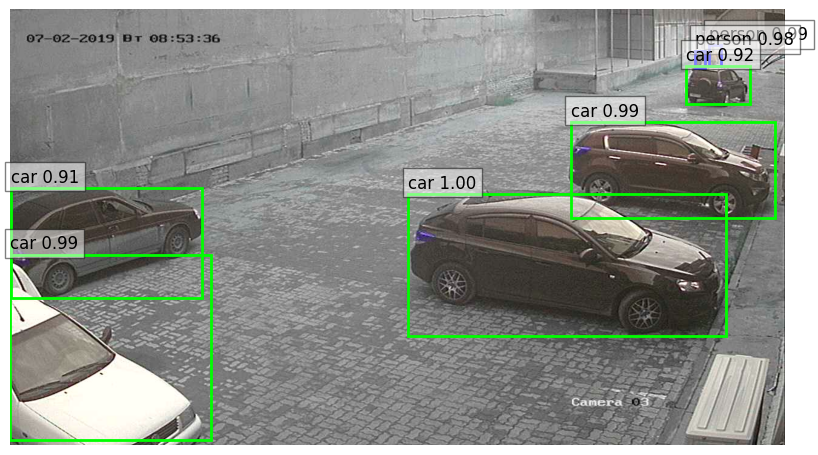

Processing 1 images
image                    shape: (897, 1124, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1124.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


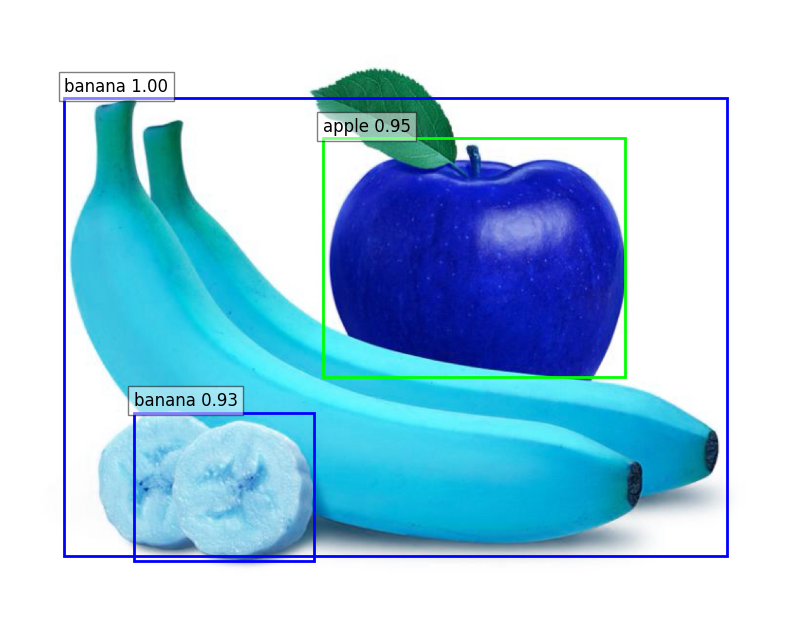

Processing 1 images
image                    shape: (877, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


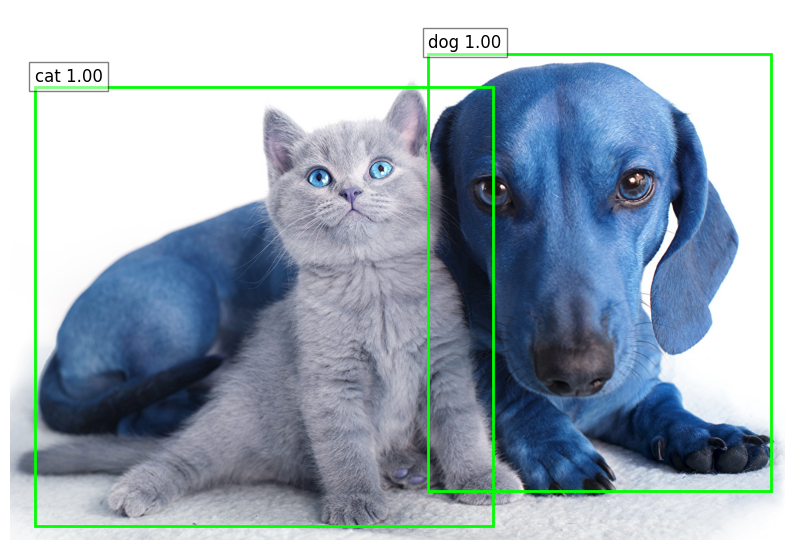

In [81]:
image_paths = [
    'image.png',
    'images/platano-manzana.jpg',
    'images/Cats_Dogs_Kittens_499344.jpg'
]

for img_path in image_paths:
    img = skimage.io.imread(img_path)
    results = model.detect([img], verbose=1)
    r = results[0]
    
    # Визуализация с черным цветом текста
    visualize_detections(img, r['masks'], r['rois'], r['class_ids'], r['scores'], class_names, text_color=(0, 0, 0))

## В среднем 9 секунд на каждое изображение

# YOLO

In [84]:
from ultralytics import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os

In [85]:
model = YOLO("yolo-Weights/yolov8m.pt")

 Download failure, retrying 1/3 https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov8m.pt...


0: 640x640 2 persons, 6 cars, 1737.8ms
1: 640x640 2 bananas, 1 apple, 1737.8ms
2: 640x640 2 cats, 1 dog, 1737.8ms
Speed: 18.3ms preprocess, 1737.8ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 6 cars, 1450.8ms
1: 640x640 2 bananas, 1 apple, 1450.8ms
2: 640x640 2 cats, 1 dog, 1450.8ms
Speed: 13.7ms preprocess, 1450.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 persons, 6 cars, 1355.2ms
1: 640x640 2 bananas, 1 apple, 1355.2ms
2: 640x640 2 cats, 1 dog, 1355.2ms
Speed: 11.8ms preprocess, 1355.2ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)
Predicted objects, all: ['1 car, ']
Speed: {'preprocess': 11.75840695699056, 'inference': 1355.1726341247559, 'postprocess': 4.134893417358398}
---
Predicted objects, all: ['1 car, ', '1 car, ']
Speed: {'preprocess': 11.75840695699056, 'inference': 1355.1726341247559, 'postprocess': 4.134893417358398}
---
Predicted objects, all: ['1 car, ', '1 car, ', '1

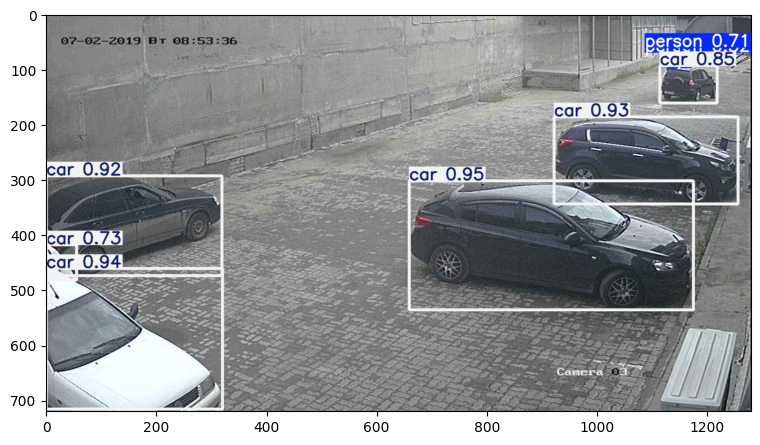

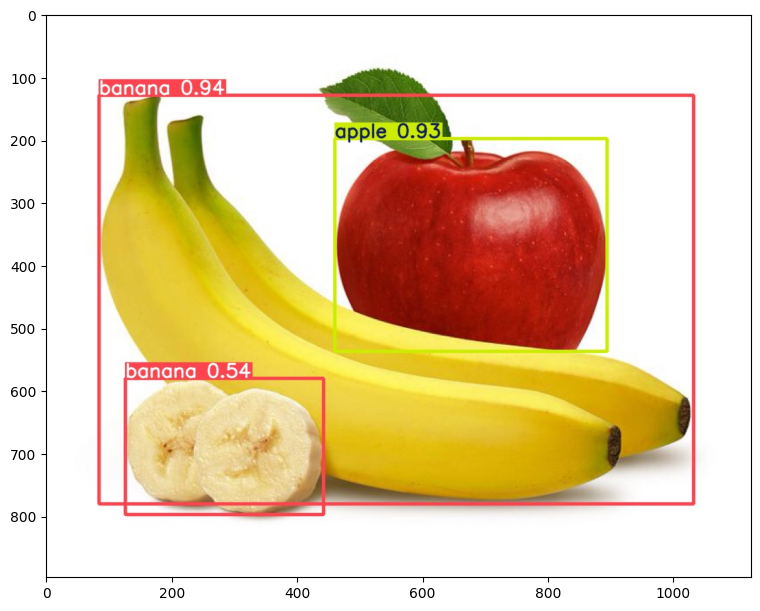

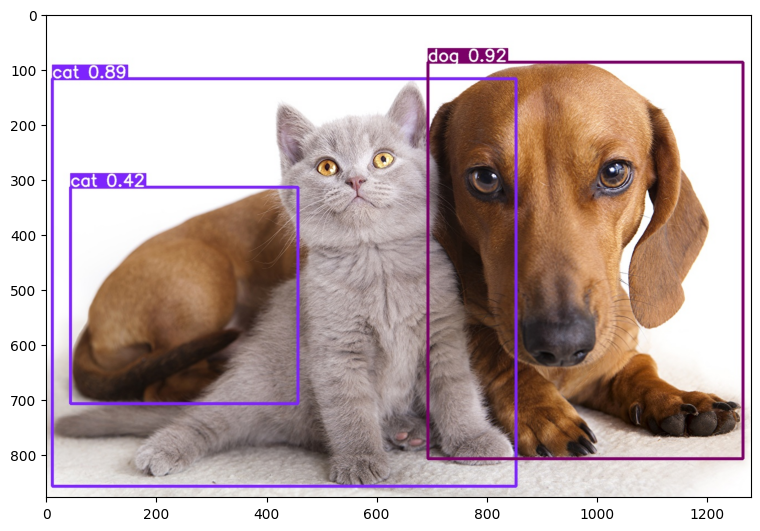

In [88]:
image_paths = [
    'image.png',
    'images/platano-manzana.jpg',
    'images/Cats_Dogs_Kittens_499344.jpg'
]

pr_obj = []
img_pred = []

for i in range(len(image_paths)):
  results = model.predict(image_paths)
  result = results[0]
  img_pred.append(result)
  pr_obj = []

for r in result:
  pr_obj.append(r.verbose())
  print(f'Predicted objects, all: {pr_obj}')
  print(f'Speed: {r.speed}')
  print("---")

for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")
  print(f'Speed: {result.speed}')

for i, r in enumerate(results):
  im_bgr = r.plot()  
  im_rgb = Image.fromarray(im_bgr[..., ::-1])  
  r.save(filename=f"yolo_res/result_{i}.jpg")

src = 'yolo_res/'
files = os.listdir(src)

for idx, image_src in enumerate(files):
  image = Image.open(f'{src}{image_src}',"r")
  plt.figure(figsize=(20,50))
  plt.subplot(4, 2, idx+1)
  plt.imshow(image)

plt.show()

## В среднем 2 секунды на каждое изображение